# UTokyo Course Catalog Tutorial

I played with this dataset and found almost nothing zzz.

## Reading Data

In [ ]:
!pip install numpy pandas sklearn matplotlib matplotx seaborn

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#df = pd.read_csv("../input/utokyosyllabus/all.csv", index_col=0)
df = pd.read_csv("./all.csv", index_col=0)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
display(df.shape)
display(df.head(1))
display(df.describe())

(14377, 38)

,時間割コード,共通科目コード,コース名,教員,学期,曜限,ねらい,教室,単位数,他学部履修可,...,学部,学科,学科コード,レベル,整理番号,授業形態,講義使用言語_,小分類,中分類,大分類
0,0122001S,FLA-SE4707S2,比較政治演習（外国語科目）,大串 和雄,"{'S1', 'S2'}","{('Mon', 5)}",現在または過去の虐殺や人権侵害の事実を否定することは頻繁に観察され、「否認主義(Denial...,法文1号館19番教室,2.0,True,...,法学部,演習科目,SE,4,707,演習,JapaneseAndEnglish,07,7,SE


,単位数
count,14377.000000
mean,2.183905
std,1.282080
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,20.000000


In [4]:
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)
df.describe()

,単位数,他学部履修可,実務経験のある教員による授業科目,中間,期末,小テスト,演習,課題,レポート,発表,出席
count,14377.000000,14377.000000,14377.00000,14377.000000,14377.000000,14377.000000,14377.000000,14377.000000,14377.000000,14377.000000,14377.000000
mean,2.183905,0.662169,0.04076,0.025110,0.262363,0.060235,0.052723,0.162760,0.429297,0.208597,0.552619
std,1.282080,0.472987,0.19774,0.156463,0.439934,0.237930,0.223488,0.369159,0.494993,0.406320,0.497241
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,20.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Change font and theme

In [5]:
import matplotx
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use(matplotx.styles.dracula)
mpl.rcParams['font.family'] = 'MS Gothic'

## KMeans

In [6]:
X = df["単位数 他学部履修可 実務経験のある教員による授業科目 中間 期末 小テスト 演習 課題 レポート 発表 出席".split()]

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [8]:
kmeans.cluster_centers_

array([[ 4.17591125e+00,  2.57527734e-01,  7.13153724e-03,
         4.43740095e-02,  1.36291601e-01,  4.12044374e-02,
         7.05229794e-02,  7.21077655e-02,  1.37083994e-01,
         2.60697306e-01,  4.45324881e-01],
       [ 1.85028751e+00,  7.26725082e-01,  4.87404162e-02,
         2.77929901e-02,  2.66840088e-01,  6.64019715e-02,
         6.24315444e-02,  1.68948521e-01,  5.15197152e-01,
         2.97508215e-01,  1.00000000e+00],
       [ 9.55600000e+00,  2.28000000e-01,  1.20000000e-02,
         3.20000000e-02,  6.00000000e-02,  4.00000000e-02,
         5.20000000e-02,  9.20000000e-02,  4.00000000e-02,
         3.00000000e-01,  3.16000000e-01],
       [ 1.83860816e+00,  6.88725049e-01,  3.92015824e-02,
         1.69034346e-02,  2.94191692e-01,  5.73637835e-02,
         3.59647545e-02,  1.78385183e-01,  4.00287718e-01,
         7.58856321e-02, -9.99200722e-16]])

In [9]:
kmeans.inertia_

19515.319824312894

100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


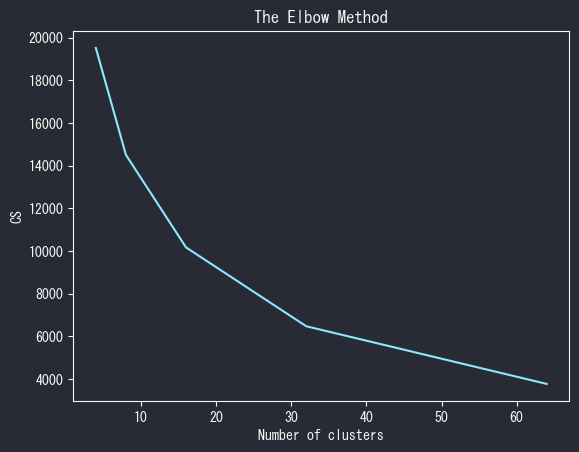

In [10]:
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt

cs = []
ns = [2 ** x for x in range(2, 7)]
for i in tqdm(ns):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(ns, cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Grouping with faculty and departments

In [11]:
df = pd.read_csv("./all.csv", index_col=0)
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)
df['scoring_sum'] = df["中間 期末 小テスト 演習 課題 レポート 発表 出席".split()].sum(axis=1)
g = df.groupby(['学部', '学科'])
display(g.mean(numeric_only=True))

単位数    他学部履修可  実務経験のある教員による授業科目       中間        期末  \
学部       学科                                                                    
人文社会系研究科 アジア文化研究専攻   2.108108  0.864865          0.000000  0.00000  0.054054   
         共通科目        1.952381  1.000000          0.000000  0.00000  0.126984   
         基礎文化研究専攻    2.086124  0.803828          0.000000  0.00000  0.153110   
         文化資源学研究専攻   2.000000  0.780488          0.000000  0.02439  0.146341   
         日本文化研究専攻    2.760000  0.840000          0.000000  0.00000  0.080000   
...                       ...       ...               ...      ...       ...   
農学部      生命化学・工学専修   3.500000  0.000000          0.000000  0.00000  0.333333   
         生物・環境工学専修   2.153846  0.000000          0.769231  0.00000  0.076923   
         生物素材科学専修    2.222222  0.000000          0.000000  0.00000  0.000000   
         緑地環境学専修     4.250000  0.000000          0.250000  0.00000  0.000000   
         農業・資源経済学専修  2.625000  0.125000          0.000000  0.00000  0.000000   

                         小テスト        演習        課題      レポート        発表  \
学部       学科                                                             
人文社会系研究科 アジア文化研究専攻   0.018018  0.009009  0.036036  0.396396  0.261261   
         共通科目        0.000000  0.031746  0.238095  0.571429  0.190476   
         基礎文化研究専攻    0.023923  0.076555  0.066986  0.588517  0.287081   
         文化資源学研究専攻   0.000000  0.000000  0.048780  0.463415  0.317073   
         日本文化研究専攻    0.000000  0.000000  0.000000  0.380000  0.280000   
...                       ...       ...       ...       ...       ...   
農学部      生命化学・工学専修   0.000000  0.000000  0.000000  0.500000  0.166667   
         生物・環境工学専修   0.000000  0.384615  0.461538  0.615385  0.076923   
         生物素材科学専修    0.000000  0.000000  0.000000  0.777778  0.111111   
         緑地環境学専修     0.000000  0.500000  0.000000  0.250000  0.750000   
         農業・資源経済学専修  0.000000  0.250000  0.125000  0.000000  0.500000   

                           出席  scoring_sum  
学部       学科                                 
人文社会系研究科 アジア文化研究専攻   0.810811     1.585586  
         共通科目        0.444444     1.603175  
         基礎文化研究専攻    0.665072     1.861244  
         文化資源学研究専攻   0.731707     1.731707  
         日本文化研究専攻    0.780000     1.520000  
...                       ...          ...  
農学部      生命化学・工学専修   0.666667     1.666667  
         生物・環境工学専修   0.538462     2.153846  
         生物素材科学専修    0.888889     1.777778  
         緑地環境学専修     0.750000     2.250000  
         農業・資源経済学専修  0.875000     1.750000  

[222 rows x 12 columns]

In [12]:
X = df[df.describe().columns]

## Kmeans with df.groupby().mean()

In [13]:
X2 = g.mean(numeric_only=True)

100%|██████████| 10/10 [00:00<00:00, 14.42it/s]


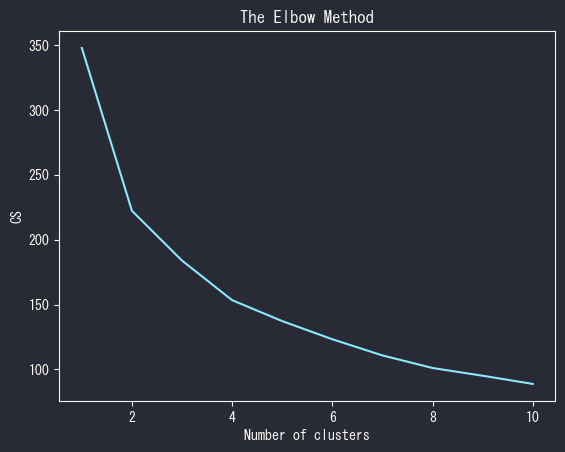

In [14]:
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt

cs = []
ns = range(1, 11)
for i in tqdm(ns):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X2)
    cs.append(kmeans.inertia_)
plt.plot(ns, cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

It was unable for me to change the font.

## Correlation matrix

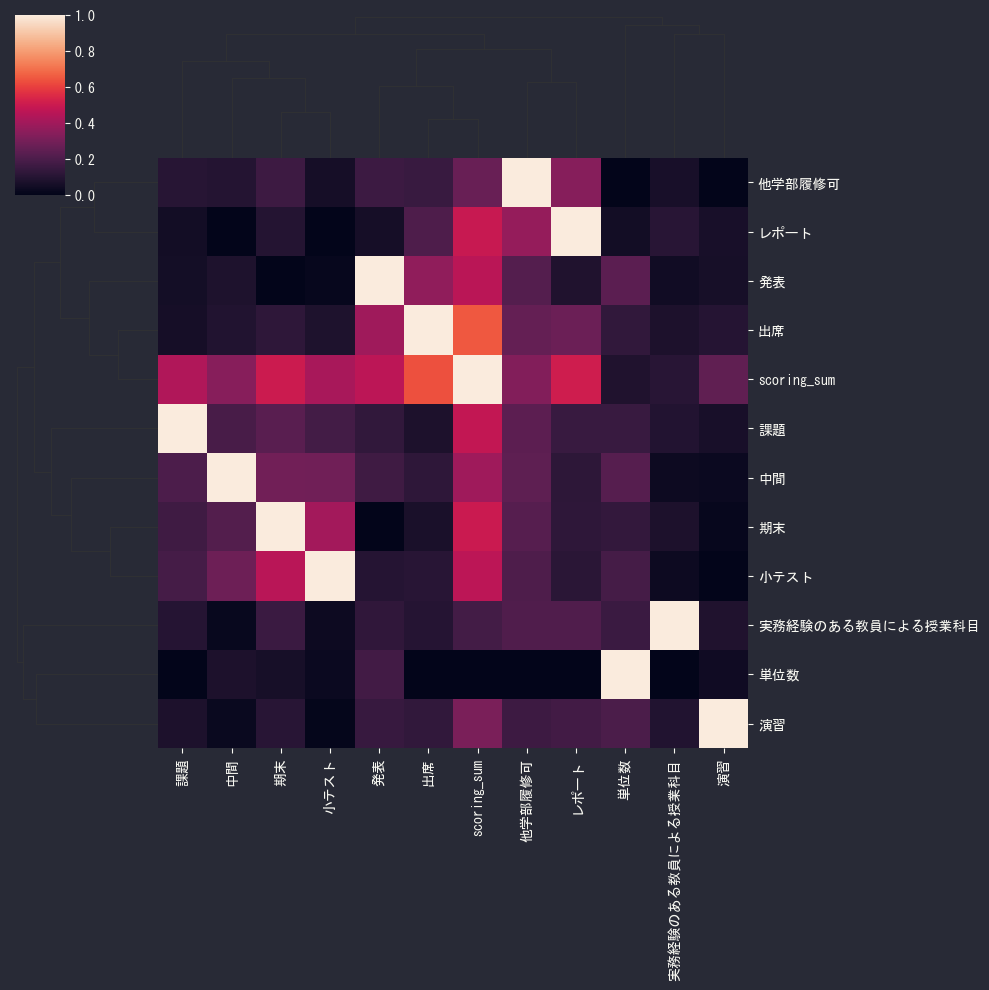

In [16]:
import seaborn as sns
sns.clustermap(X.corr(), metric='correlation', 
             standard_scale=1, linewidths=0) 

## Hierarchical Clustering

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.spatial.distance import  pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# Scaling
X = X.astype(float)
scaler = MinMaxScaler()  
solutions_set_scaled = scaler.fit_transform(X)
solutions_set_scaled = pd.DataFrame(X, columns = X.columns)
# transpose and convert solutions set to numpy
np_solutions_set = solutions_set_scaled.T.values
# calculate the distances
solutions_set_dist = pdist(np_solutions_set)
# hierarchical clusterization
linked = linkage(solutions_set_dist, 'ward')

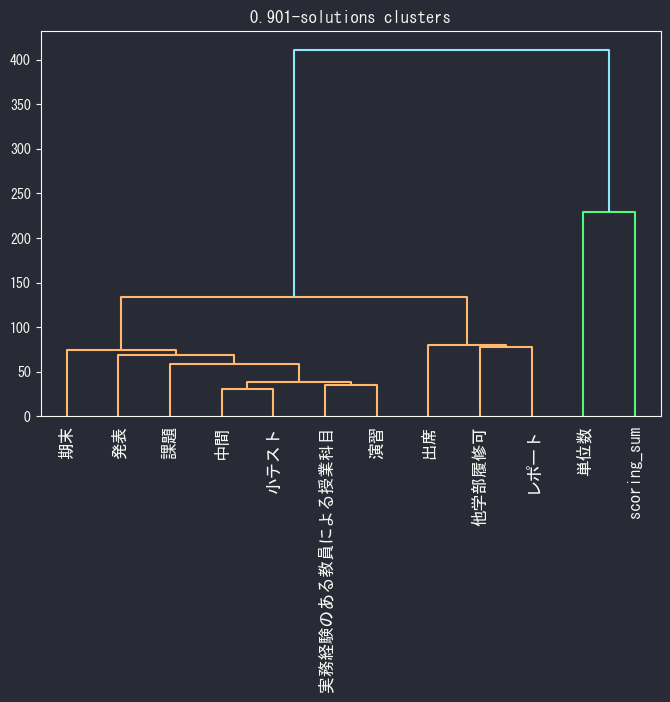

In [18]:
# dendrogram

fig = plt.figure(figsize=(8, 5))

dendrogram(linked, labels = solutions_set_scaled.columns)
plt.xticks(rotation=90)
plt.title('0.901-solutions clusters')
plt.show()

## I want to go to the department with the least attendance!

In [29]:
count = g.count().iloc[:, 0]
count.name = 'count'
X3 = pd.concat([X2, count], axis=1)
X3 = X3[X3["count"] > 15]
#X3["attendance"].plot.bar()
X4 = X3.drop(columns=["単位数", "count", "scoring_sum"], inplace=False)
X5 = X4.stack().reset_index(name='val').rename(columns={'level_2': '評価方法'})
display(X4)
display(X5.head(20))

他学部履修可  実務経験のある教員による授業科目        中間        期末      小テスト  \
学部        学科                                                                    
人文社会系研究科  アジア文化研究専攻  0.864865          0.000000  0.000000  0.054054  0.018018   
          共通科目       1.000000          0.000000  0.000000  0.126984  0.000000   
          基礎文化研究専攻   0.803828          0.000000  0.000000  0.153110  0.023923   
          文化資源学研究専攻  0.780488          0.000000  0.024390  0.146341  0.000000   
          日本文化研究専攻   0.840000          0.000000  0.000000  0.080000  0.000000   
...                       ...               ...       ...       ...       ...   
農学生命科学研究科 農業・資源経済学   1.000000          0.000000  0.000000  0.024390  0.000000   
農学部       共通         0.868852          0.081967  0.032787  0.409836  0.049180   
          応用生命科学課程   0.958333          0.141667  0.016667  0.733333  0.183333   
          獣医学専修      0.200000          0.176471  0.000000  0.658824  0.117647   
          環境資源学課程    0.977011          0.229885  0.080460  0.586207  0.068966   

                           演習        課題      レポート        発表        出席  
学部        学科                                                           
人文社会系研究科  アジア文化研究専攻  0.009009  0.036036  0.396396  0.261261  0.810811  
          共通科目       0.031746  0.238095  0.571429  0.190476  0.444444  
          基礎文化研究専攻   0.076555  0.066986  0.588517  0.287081  0.665072  
          文化資源学研究専攻  0.000000  0.048780  0.463415  0.317073  0.731707  
          日本文化研究専攻   0.000000  0.000000  0.380000  0.280000  0.780000  
...                       ...       ...       ...       ...       ...  
農学生命科学研究科 農業・資源経済学   0.000000  0.000000  0.219512  0.317073  0.719512  
農学部       共通         0.032787  0.377049  0.590164  0.065574  0.590164  
          応用生命科学課程   0.008333  0.225000  0.416667  0.016667  0.591667  
          獣医学専修      0.117647  0.070588  0.317647  0.105882  0.352941  
          環境資源学課程    0.022989  0.344828  0.597701  0.011494  0.701149  

[160 rows x 10 columns]

,学部,学科,評価方法,val
0,人文社会系研究科,アジア文化研究専攻,他学部履修可,0.864865
1,人文社会系研究科,アジア文化研究専攻,実務経験のある教員による授業科目,0.000000
2,人文社会系研究科,アジア文化研究専攻,中間,0.000000
3,人文社会系研究科,アジア文化研究専攻,期末,0.054054
4,人文社会系研究科,アジア文化研究専攻,小テスト,0.018018
5,人文社会系研究科,アジア文化研究専攻,演習,0.009009
6,人文社会系研究科,アジア文化研究専攻,課題,0.036036
7,人文社会系研究科,アジア文化研究専攻,レポート,0.396396
8,人文社会系研究科,アジア文化研究専攻,発表,0.261261
9,人文社会系研究科,アジア文化研究専攻,出席,0.810811


<AxesSubplot: ylabel='Proportion'>

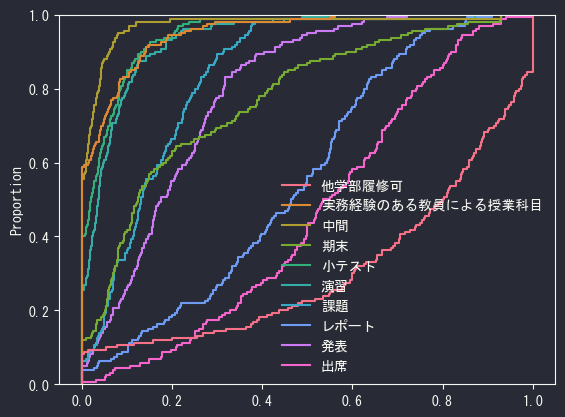

In [30]:
sns.ecdfplot(X4)

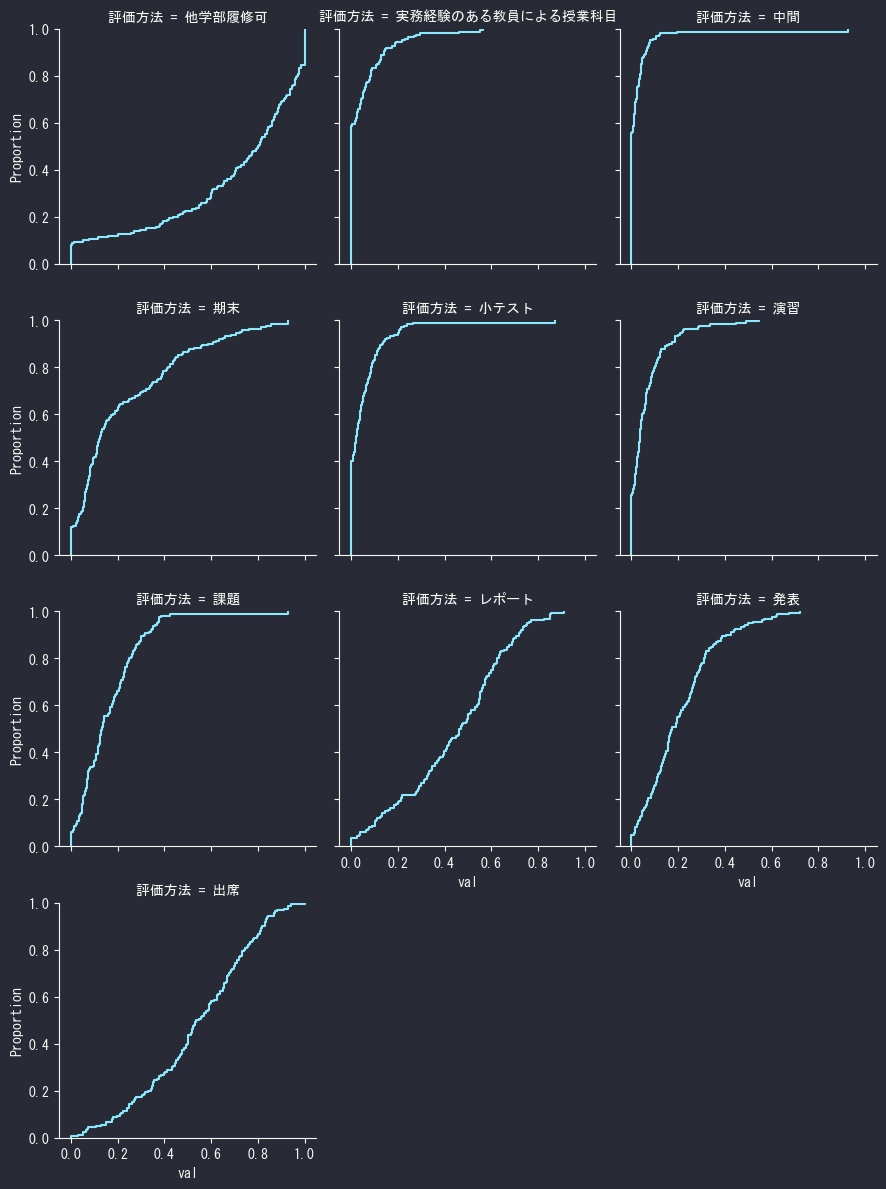

In [32]:
grid = sns.FacetGrid(X5, col="評価方法", col_wrap=3)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid.map(sns.ecdfplot, 'val')

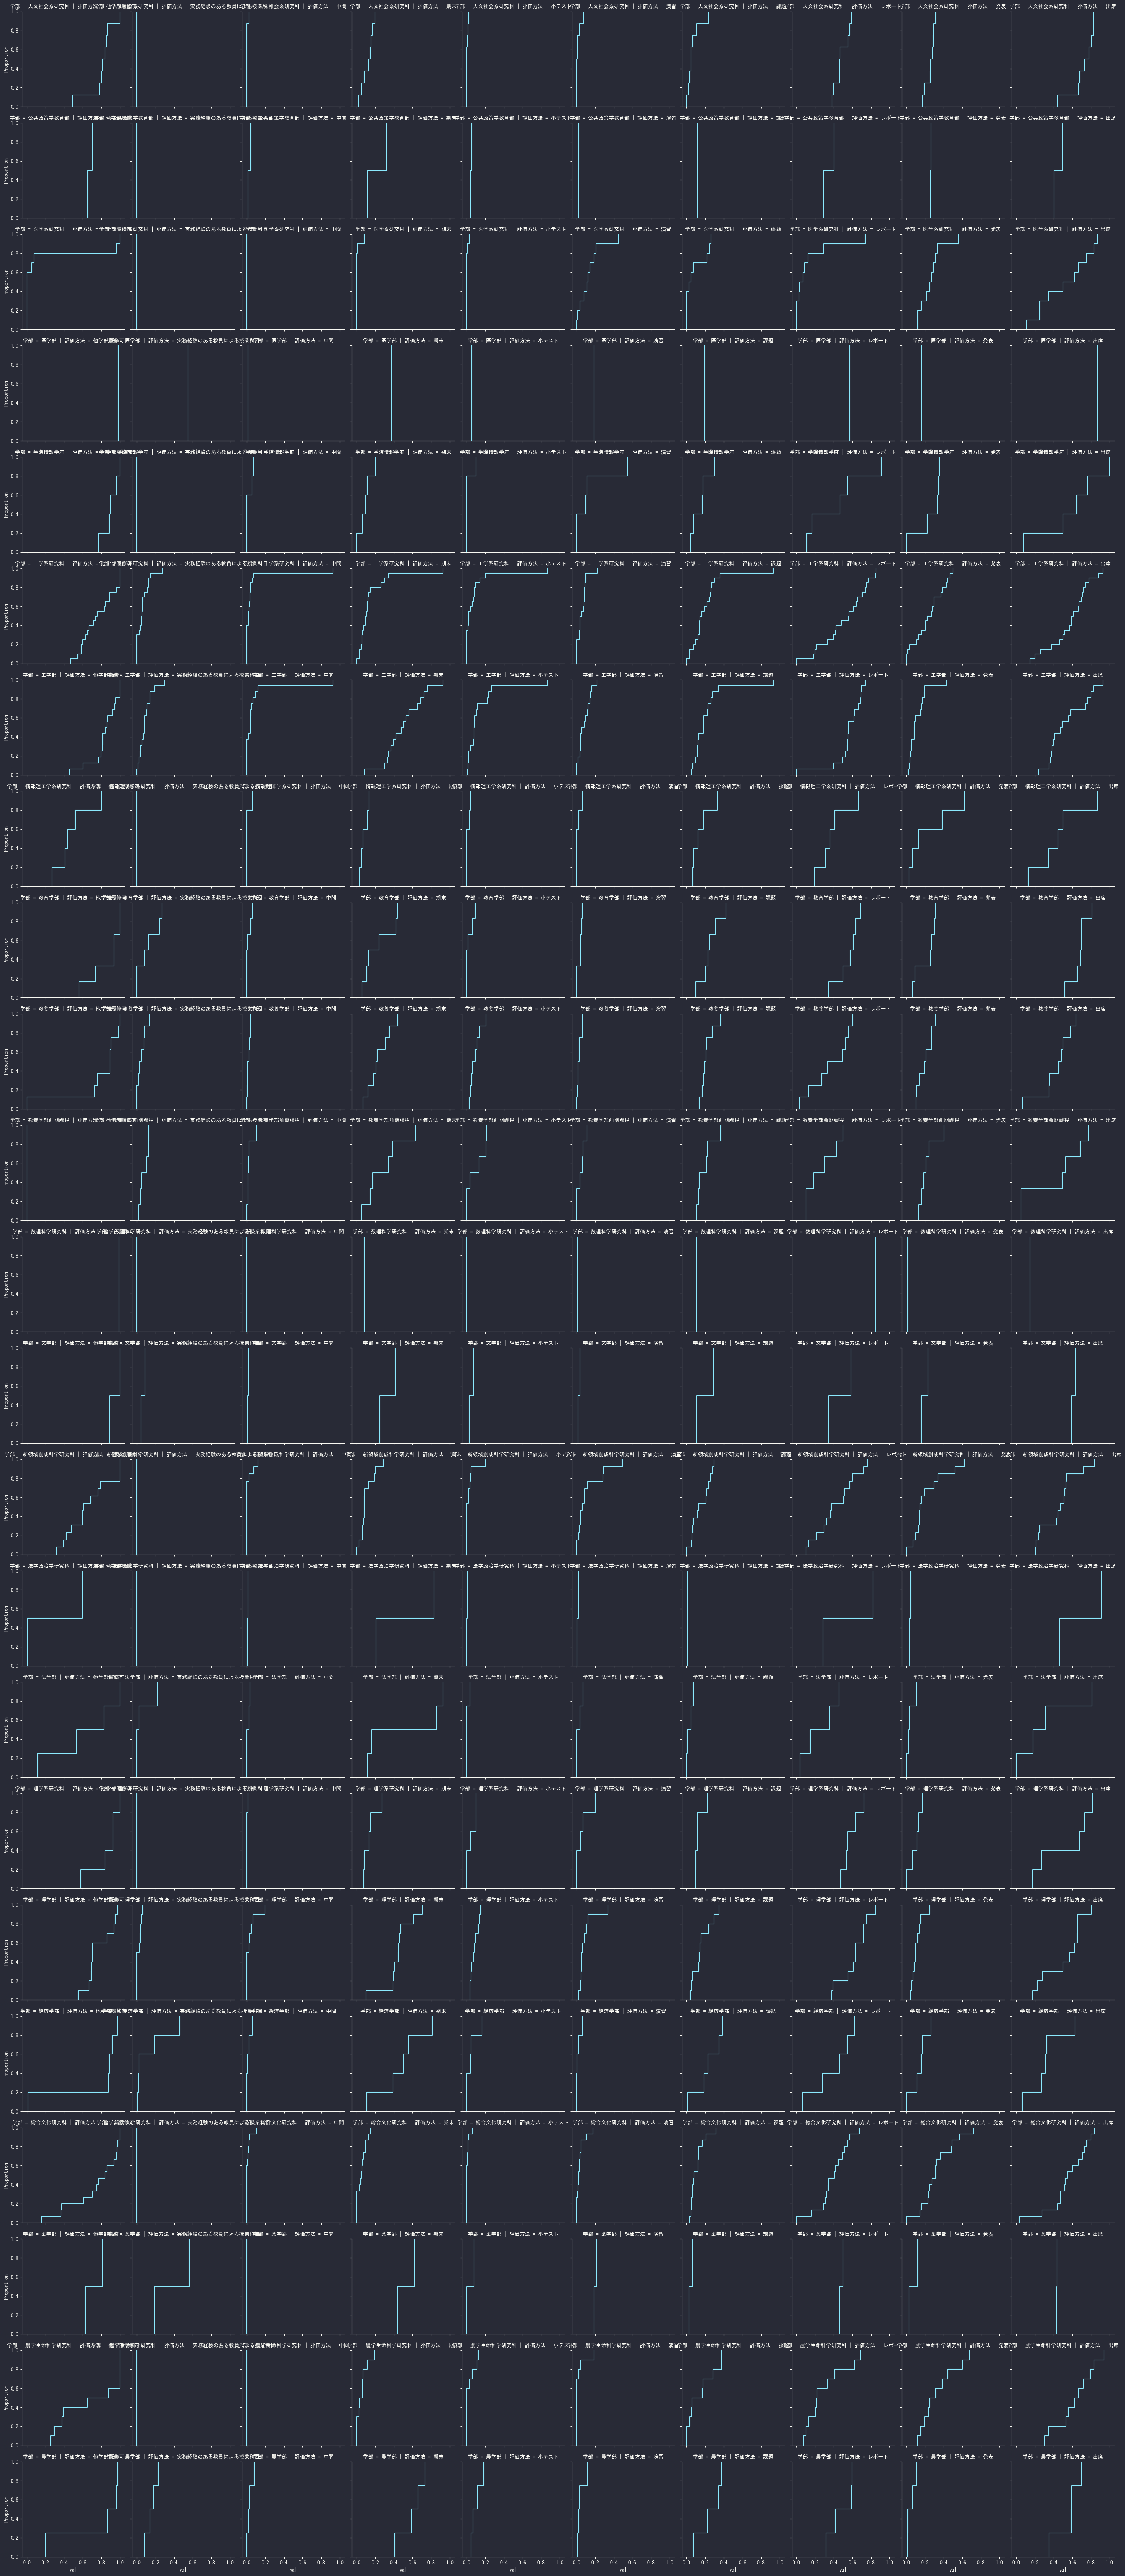

In [33]:
grid = sns.FacetGrid(X5, col="評価方法", row="学部")

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid.map(sns.ecdfplot, 'val')